Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import norm
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression

Load

In [7]:
data = pd.read_csv('MeetingsCleanInfo.csv',sep=';')
data['Fecha-Hora'] = pd.to_datetime(data['Fecha'] + ' ' + data['Hora'], format='%d/%m/%Y %H:%M:%S')
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

In [8]:
data

,ID,Tipo,Curso,Fecha,Hora,Hora Inicio,Hora Fin,Puntualidad (minutos),Duración (minutos),Alumnos Inscritos,Alumnos Participantes,Participantes,Total de minutos de los participantes,Fecha-Hora
0,885 1636 2512,Taller,GEOMETRIA,2025-06-04,13:00:00,12:53:47,14:07:45,6.22,74,1,1,2,133,2025-06-04 13:00:00
1,839 4685 8633,Taller,GEOMETRIA,2025-06-04,17:30:00,17:25:15,18:40:48,4.75,76,6,7,8,279,2025-06-04 17:30:00
2,874 1998 5448,Taller,GEOMETRIA,2025-06-04,14:45:00,14:40:30,16:16:49,4.50,97,2,1,2,188,2025-06-04 14:45:00
3,849 6575 1141,Taller,ESTADISTICA DESCRIPTIVA Y PROB,2025-06-06,17:30:00,17:21:55,18:51:54,8.08,90,36,15,16,530,2025-06-06 17:30:00
4,842 9161 9284,Taller,CÁLCULO I,2025-06-06,14:45:00,14:40:08,17:21:07,4.87,161,10,6,7,464,2025-06-06 14:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,838 7095 6448,Tutoría,MATEMÁTICA PARA MEDICINA,2025-08-27,9:15:00,9:07:14,10:02:05,7.77,55,1,1,2,95,2025-08-27 09:15:00
143,844 0618 8819,Taller,CÁLCULO II,2025-08-29,14:45:00,14:05:52,16:20:23,39.13,135,35,25,26,1073,2025-08-29 14:45:00
144,842 7457 2064,Taller,MATEMÁTICA II,2025-08-29,16:30:00,16:09:43,17:55:59,20.28,107,72,50,51,2172,2025-08-29 16:30:00
145,881 3904 3602,Taller,CÁLCULO II,2025-08-29,12:45:00,12:27:17,14:05:38,17.72,99,20,15,16,465,2025-08-29 12:45:00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     147 non-null    object        
 1   Tipo                                   147 non-null    object        
 2   Curso                                  147 non-null    object        
 3   Fecha                                  147 non-null    datetime64[ns]
 4   Hora                                   147 non-null    object        
 5   Hora Inicio                            147 non-null    object        
 6   Hora Fin                               147 non-null    object        
 7   Puntualidad (minutos)                  147 non-null    float64       
 8   Duración (minutos)                     147 non-null    int64         
 9   Alumnos Inscritos                      147 non-null    int64     

In [10]:
data.shape

(147, 14)

Selection

In [11]:
data_participantes = data['Alumnos Participantes']
data_inscritos = data['Alumnos Inscritos']
data_puntualidad = data['Puntualidad (minutos)']

In [12]:
data_participantes_calculo = data[['Alumnos Inscritos','Alumnos Participantes']][data['Curso'] == 'CÁLCULO I']
data_participantes_calculo

,Alumnos Inscritos,Alumnos Participantes
4,10,6
6,29,22
7,22,7
8,25,4
10,36,23
12,56,48
19,22,13
20,13,12
21,8,7
22,7,6


In [13]:
def histogram(data,bins=None,stat="density",kde=True, title=None):
    xline = np.linspace(data.min(), data.max(), 100)
    plt.plot(xline, norm.pdf(xline, data.mean(), data.std()), 'r')
    if bins is None:
        bins = len(data)
    sns.histplot(data,bins=bins, stat=stat,kde=kde)
    plt.title(title)
    plt.show()

Global Analytics

In [14]:
numerical_columns = ['Puntualidad (minutos)','Duración (minutos)','Alumnos Inscritos','Alumnos Participantes']
numerical_data = data[numerical_columns]
numerical_data


,Puntualidad (minutos),Duración (minutos),Alumnos Inscritos,Alumnos Participantes
0,6.22,74,1,1
1,4.75,76,6,7
2,4.50,97,2,1
3,8.08,90,36,15
4,4.87,161,10,6
...,...,...,...,...
142,7.77,55,1,1
143,39.13,135,35,25
144,20.28,107,72,50
145,17.72,99,20,15


In [15]:
correlation = numerical_data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Puntualidad (minutos),Duración (minutos),Alumnos Inscritos,Alumnos Participantes
Puntualidad (minutos),1.000000,0.363871,0.310004,0.307390
Duración (minutos),0.363871,1.000000,0.635021,0.654129
Alumnos Inscritos,0.310004,0.635021,1.000000,0.959499
Alumnos Participantes,0.307390,0.654129,0.959499,1.000000


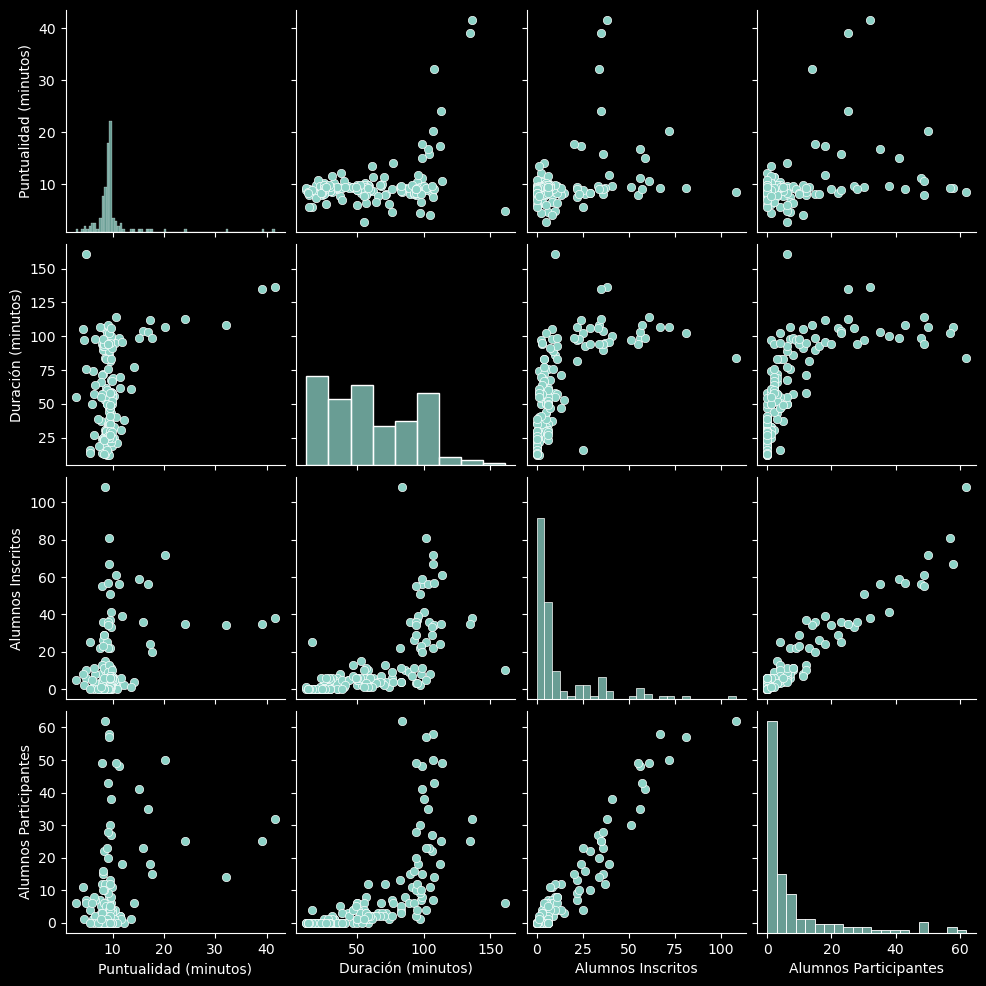

In [16]:
sns.pairplot(numerical_data)
plt.show()

Puntualidad

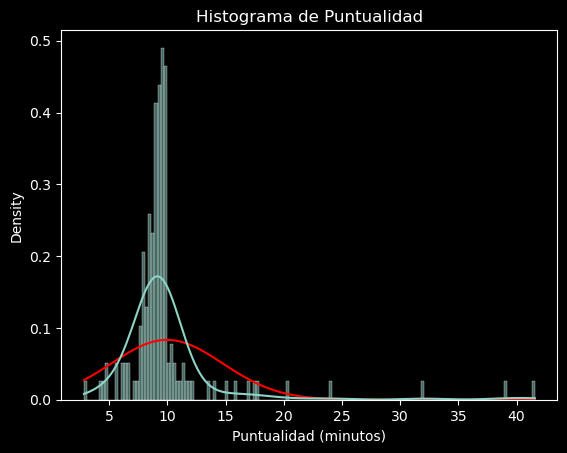

In [17]:
histogram(data_puntualidad,title="Histograma de Puntualidad")

Participantes

In [18]:
data_participantes.describe()

count    147.000000
mean       8.108844
std       13.570783
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max       62.000000
Name: Alumnos Participantes, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_20204\334944608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_participantes,bins=147,fit=norm)


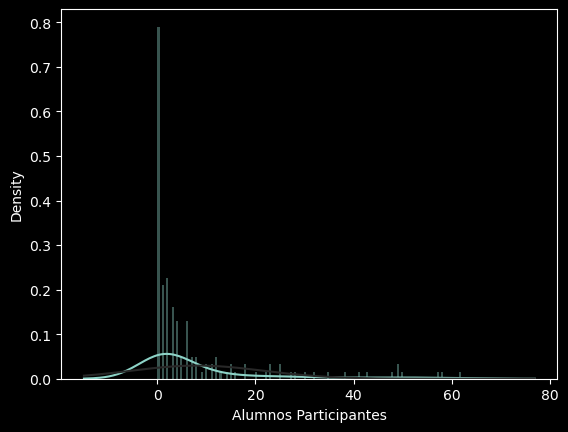

In [19]:
sns.distplot(data_participantes,bins=147,fit=norm)
plt.show()

Alumnos Participantes

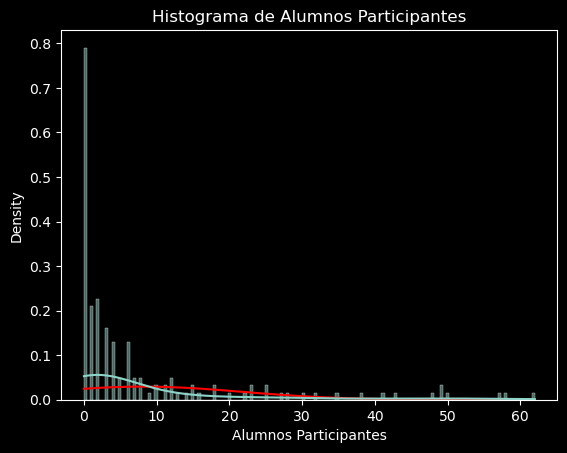

In [20]:
histogram(data_participantes,title="Histograma de Alumnos Participantes")

Inscritos

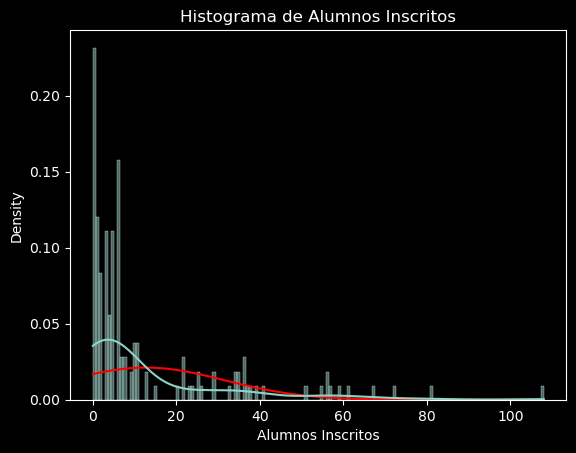

In [21]:
histogram(data_inscritos,title="Histograma de Alumnos Inscritos")

Cálculo I

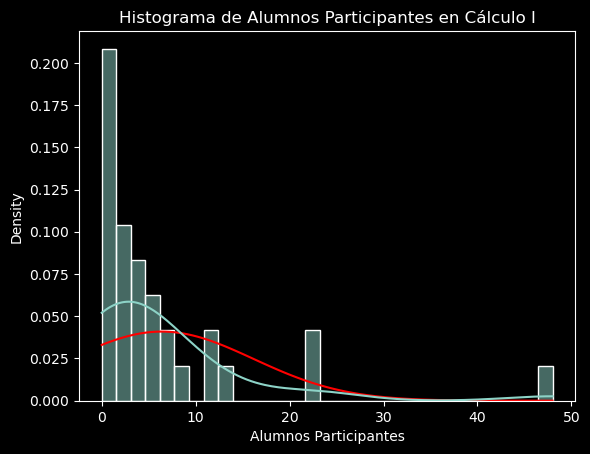

In [22]:
histogram(data_participantes_calculo['Alumnos Participantes'],title="Histograma de Alumnos Participantes en Cálculo I")

Inscritos por fecha

In [23]:
data_inscritos_fecha = data[['Fecha-Hora','Alumnos Inscritos']]
data_inscritos_fecha_sorted = data_inscritos_fecha.sort_values('Fecha-Hora',ascending=True,ignore_index=True)
data_inscritos_fecha_sorted

,Fecha-Hora,Alumnos Inscritos
0,2025-06-04 13:00:00,1
1,2025-06-04 14:45:00,2
2,2025-06-04 17:30:00,6
3,2025-06-06 13:00:00,8
4,2025-06-06 14:45:00,10
...,...,...
142,2025-08-27 16:30:00,33
143,2025-08-29 11:00:00,34
144,2025-08-29 12:45:00,20
145,2025-08-29 14:45:00,35


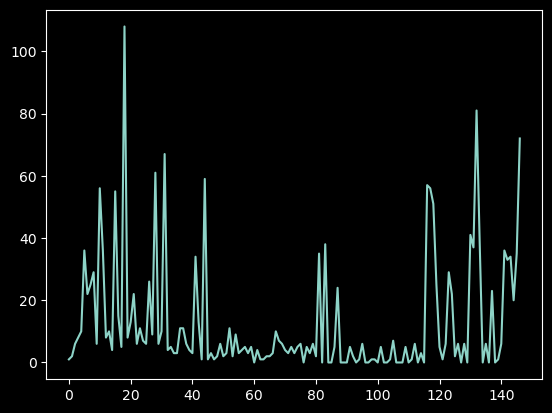

In [24]:
xline = np.linspace(0, len(data_inscritos_fecha_sorted)-1, len(data_inscritos_fecha_sorted))
plt.plot(xline,data_inscritos_fecha_sorted['Alumnos Inscritos'])
plt.show()

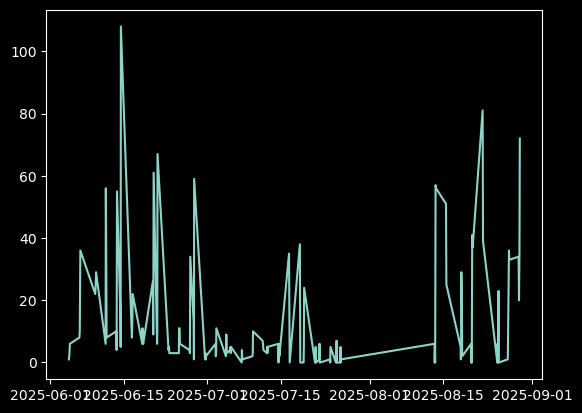

In [25]:
plt.plot(data_inscritos_fecha_sorted['Fecha-Hora'],data_inscritos_fecha_sorted['Alumnos Inscritos'])
plt.show()

Participantes por Fecha

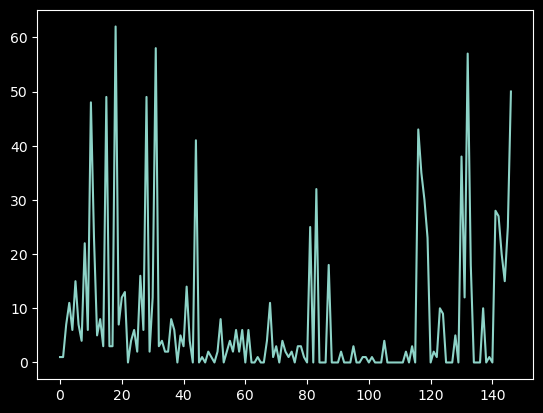

In [26]:
data_participantes_fecha = data[['Fecha-Hora','Alumnos Participantes']]
data_participantes_fecha_sorted = data_participantes_fecha.sort_values('Fecha-Hora',ascending=True,ignore_index=True)
xline = np.linspace(0, len(data_participantes_fecha_sorted)-1, len(data_participantes_fecha_sorted))
plt.plot(xline,data_participantes_fecha_sorted['Alumnos Participantes'])
plt.show()

Inscritos vs Alumnos Participantes

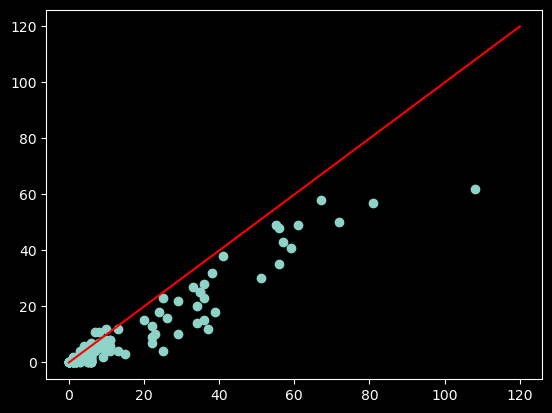

In [27]:
plt.plot([0,120],[0,120],color='red')
plt.scatter(data['Alumnos Inscritos'],data['Alumnos Participantes'])
plt.show()

In [28]:
correlation = data[['Alumnos Inscritos','Alumnos Participantes']].corr()
correlation.style.background_gradient(cmap='coolwarm')

,Alumnos Inscritos,Alumnos Participantes
Alumnos Inscritos,1.000000,0.959499
Alumnos Participantes,0.959499,1.000000


In [29]:
data['Alumnos Participantes']

0       1
1       7
2       1
3      15
4       6
       ..
142     1
143    25
144    50
145    15
146    20
Name: Alumnos Participantes, Length: 147, dtype: int64

In [30]:
model = LinearRegression()
model.fit(data[['Alumnos Inscritos']],data['Alumnos Participantes'])
print(f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: -0.6432525199474597, Slope: [0.6898435]


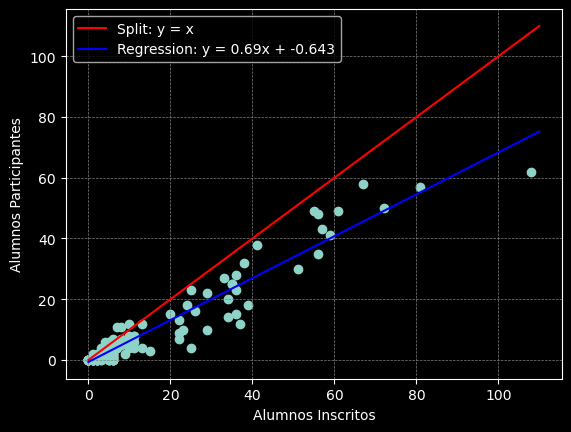

In [31]:
X_MAX = 110
plt.xlabel('Alumnos Inscritos')
plt.ylabel('Alumnos Participantes')
plt.plot([0,X_MAX],[0,X_MAX],color='red',label = f'Split: y = x')
m = round(model.coef_[0],3)
b = round(model.intercept_,3)
plt.plot([0,X_MAX],[m*0+b,m*X_MAX+b],color='blue',label = f'Regression: y = {m}x + {b}')
plt.scatter(data['Alumnos Inscritos'],data['Alumnos Participantes'])
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

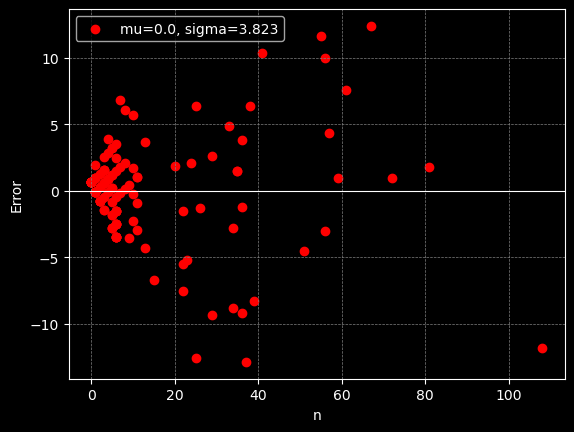

In [32]:
plt.xlabel('n')
plt.ylabel('Error')
plt.axhline(y=0, linestyle='-', linewidth=0.8)
error = data['Alumnos Participantes'] - model.predict(data[['Alumnos Inscritos']])
plt.scatter(data['Alumnos Inscritos'],error,color='red',label = f'mu={round(error.mean(),3)}, sigma={round(error.std(),3)}')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

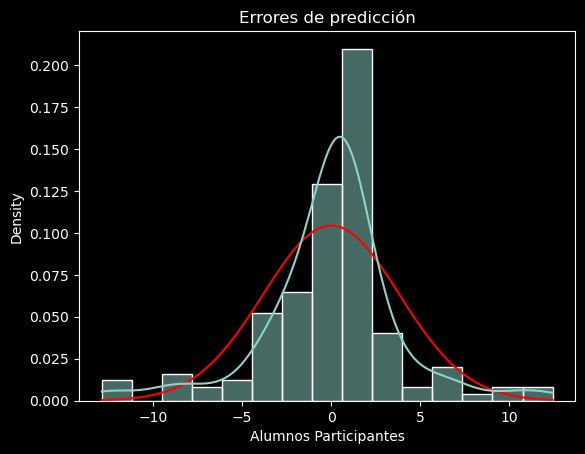

In [33]:
histogram(error,bins=15,title='Errores de predicción')

In [34]:
class CustomLinearRegression:
    def __init__(self,data,column_X,column_Y,group_column=None,group_label=None):
        """
        Args:
            data : Origin data
            column_X : Input data (1-dimensional)
            column_Y : Output data (1-dimensional)
            group_column (optional): Column name of the column which apply the group. Defaults to None.
            group_label (optional): Label of the group (must belong to the group_column column). Defaults to None.
        """
        if group_column==None or group_label==None:
            self.data = data[[column_X,column_Y]]
        else:
            self.data = data[[column_X,column_Y]][data[group_column] == group_label]
        self.column_X = column_X
        self.column_Y = column_Y
        self.model = LinearRegression()
        self.model.fit(self.data[[column_X]],self.data[column_Y])
        self.group_column = group_column
        self.group_label = group_label
    
    def dispersion(self,split=True):
        X_MAX = 1.05*self.data[self.column_X].max()
        X_MIN = 1.05*self.data[self.column_X].min()
        plt.xlabel(self.column_X)
        plt.ylabel(self.column_Y)
        if split:
            plt.plot([X_MIN,X_MAX],[X_MIN,X_MAX],color='red',label = f'Split: y = x')
        m = round(self.model.coef_[0],3)
        b = round(self.model.intercept_,3)
        plt.title(self.group_label)
        plt.plot([X_MIN,X_MAX],[m*X_MIN+b,m*X_MAX+b],color='blue',label = f'Regression (n={len(self.data)}): y = {m}x + {b}')
        plt.scatter(self.data[self.column_X],self.data[self.column_Y])
        plt.legend()
        plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        plt.show()
        
    def error(self,digits=3):
        plt.title(self.group_label)
        plt.xlabel('n')
        plt.ylabel('Error')
        plt.axhline(y=0, linestyle='-', linewidth=0.8)
        error = self.data[self.column_Y] - self.model.predict(self.data[[self.column_X]])
        plt.scatter(self.data[self.column_Y],error,color='red',label = f'(n={len(self.data)}) mu={round(error.mean(),digits)}, sigma={round(error.std(),digits)}')
        plt.legend()
        plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        plt.show()

Inscritos-Participantes (Por curso)

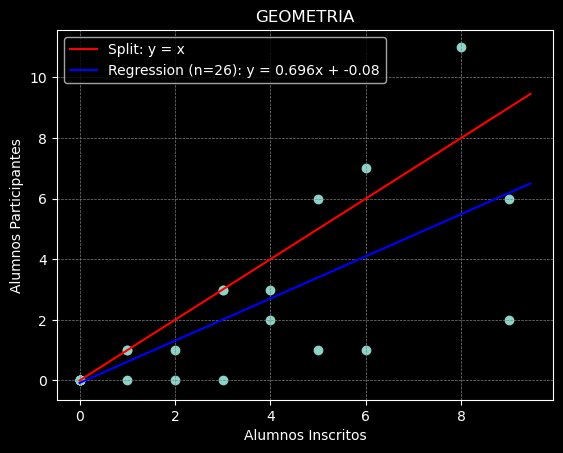

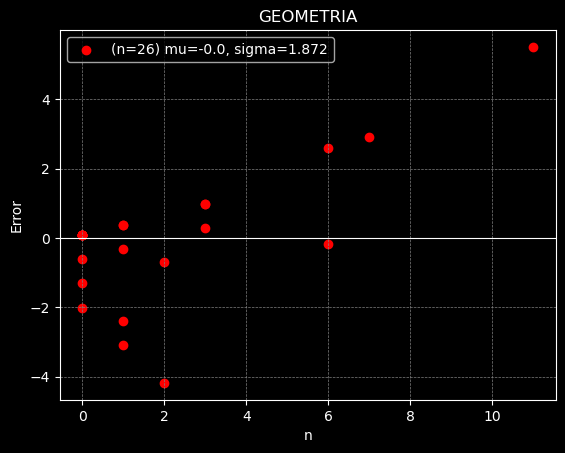

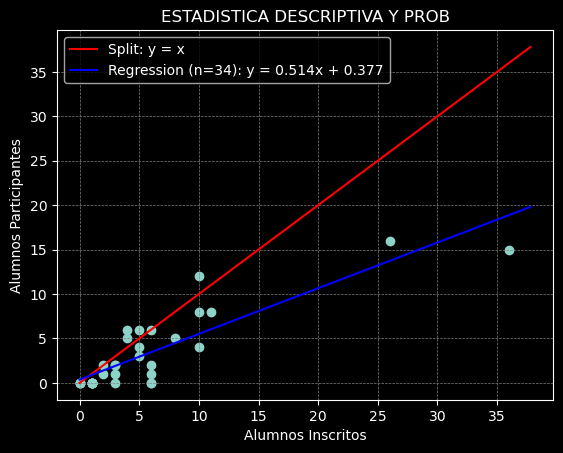

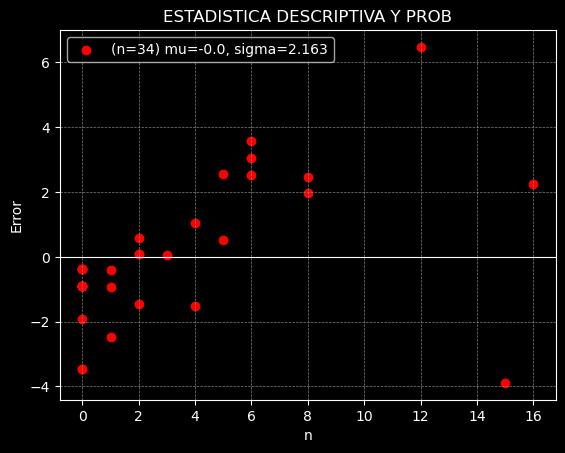

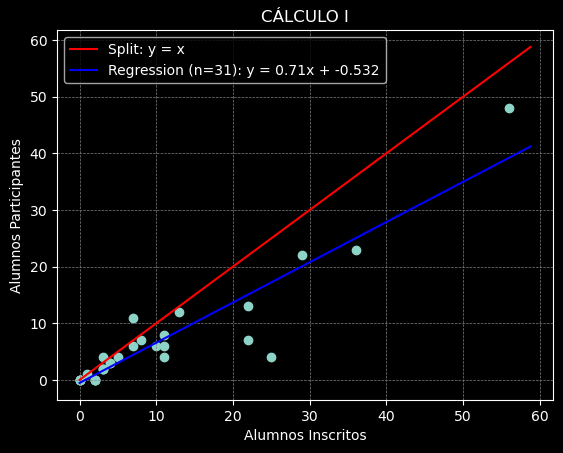

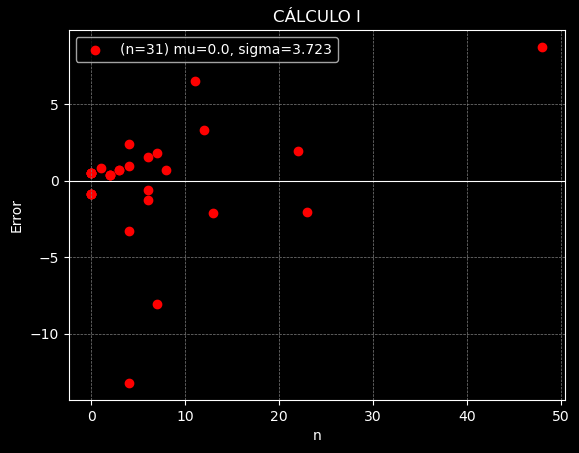

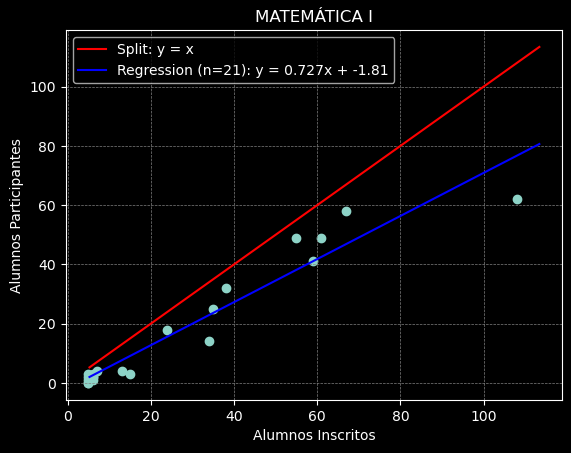

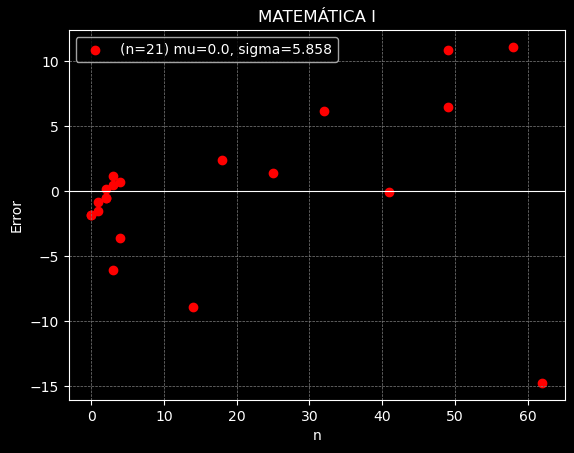

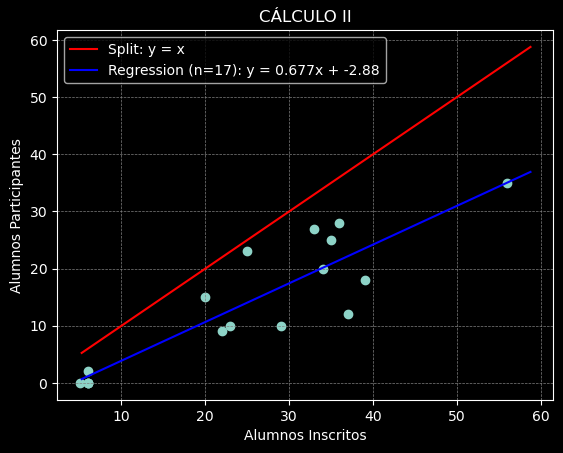

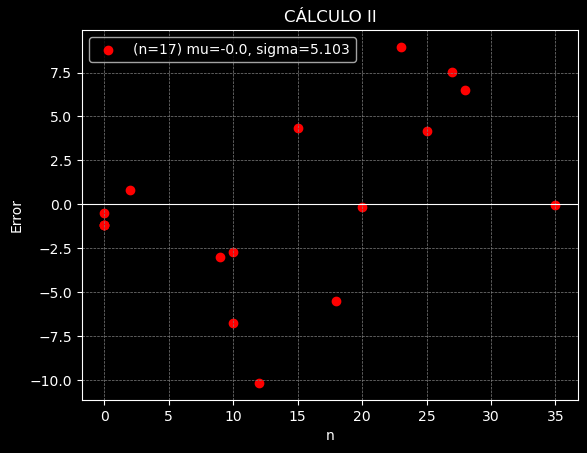

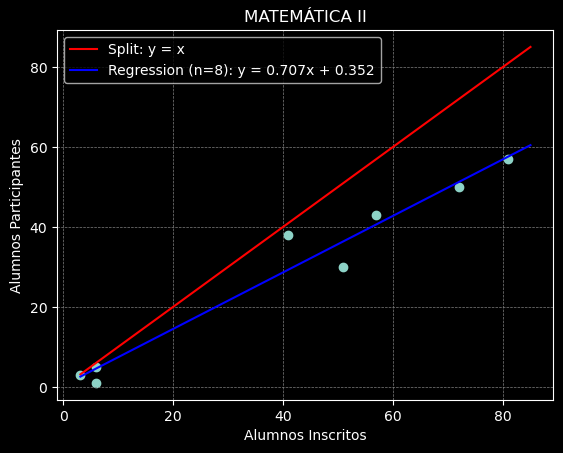

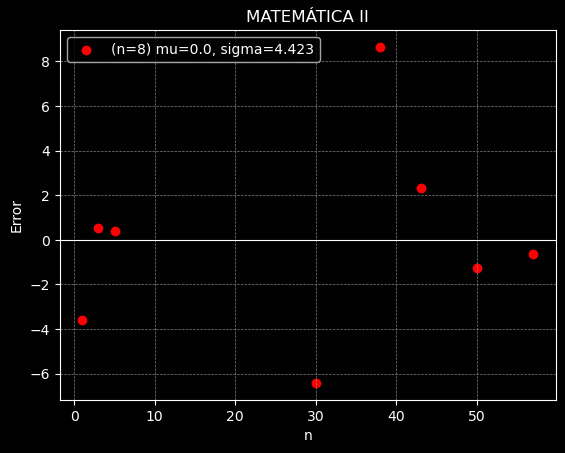

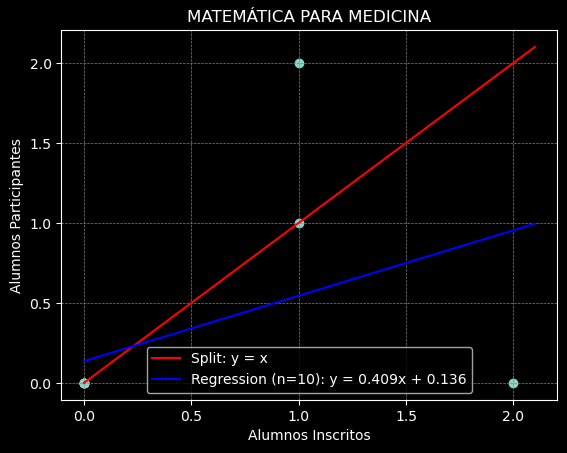

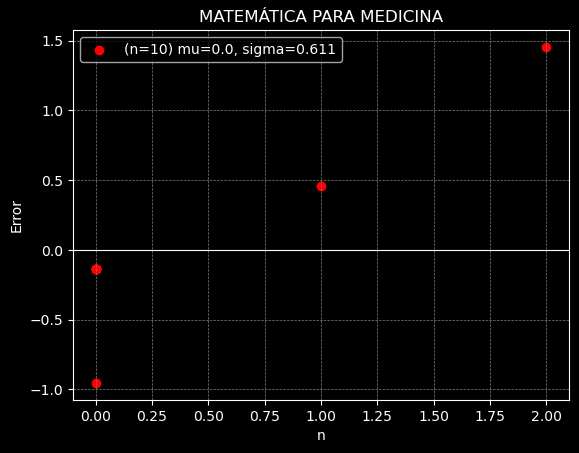

In [35]:
for curso in data['Curso'].unique():
    curso_dispersion = CustomLinearRegression(data,'Alumnos Inscritos','Alumnos Participantes','Curso',curso)
    curso_dispersion.dispersion()
    curso_dispersion.error()

Inscritos-Participantes (Global)

In [36]:
class X_given_Y:
    def __init__(self,data,column_X,column_Y):
        self.data = data
        self.column_X = column_X
        self.column_Y = column_Y
        self.data_X = self.data[column_X]
        self.data_Y = self.data[column_Y]
    
    def distribution(self,value_of_Y,extend_names=True):
        data_value_counts = self.data_X[self.data_Y==value_of_Y].value_counts() #contains the numbers of X given Y (ascending in Y)
        data_value_counts = data_value_counts.sort_index()
        s=sum(data_value_counts)
        data_value_counts = data_value_counts/s
        if extend_names:
            data_value_counts.rename(f'P({self.column_X}=x|{self.column_Y}={value_of_Y})',inplace=True)
        else:
            data_value_counts.rename(f'P(X=x|Y={value_of_Y})',inplace=True)
        return pd.DataFrame(data_value_counts)
    
    def matrix_distribution(self,decimals=3):
        X_unique = self.data_X.unique()
        Y_unique = self.data_Y.unique()
        lenx = len(X_unique)
        leny = len(Y_unique)
        X_labels = sorted(X_unique)
        Y_labels = sorted(Y_unique)
        matrix = np.zeros((leny,lenx+1))
        for i in range(leny):
            data_value_counts = self.data_X[self.data_Y==Y_labels[i]].value_counts() #contains the numbers of X given Y (ascending in Y)
            data_value_counts = data_value_counts.sort_index()
            s=sum(data_value_counts)
            for j in range(1,lenx+1):
                try: #j must be such that j-1 in Dom((data_value_counts) o (X_labels)))
                    matrix[i][j] = round(data_value_counts[X_labels[j-1]]/s,decimals)
                except:
                    pass
        for i in range(leny):
            matrix[i][0] = round(Y_labels[i],decimals)
        matrix = pd.DataFrame(matrix)
        dict = {0:'Y'}
        for i in range(1,lenx+1):
            dict[i] = 'X='+str(X_labels[i-1])
        matrix.rename(columns=dict,inplace=True)
        return matrix

In [37]:
Participantes_given_Inscritos = X_given_Y(data,'Alumnos Participantes','Alumnos Inscritos')

# Generar matriz de distribuciones
Participantes_given_Inscritos.matrix_distribution().style.background_gradient(cmap='coolwarm')

,Y,X=0,X=1,X=2,X=3,X=4,X=5,X=6,X=7,X=8,X=9,X=10,X=11,X=12,X=13,X=14,X=15,X=16,X=18,X=20,X=22,X=23,X=25,X=27,X=28,X=30,X=32,X=35,X=38,X=41,X=43,X=48,X=49,X=50,X=57,X=58,X=62
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.615000,0.308000,0.077000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.000000,0.667000,0.222000,0.111000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.000000,0.167000,0.083000,0.417000,0.250000,0.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.000000,0.000000,0.000000,0.167000,0.500000,0.000000,0.167000,0.167000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.000000,0.250000,0.167000,0.083000,0.167000,0.167000,0.000000,0.167000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.000000,0.294000,0.235000,0.235000,0.059000,0.000000,0.059000,0.059000,0.059000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.333000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
#Generar la tabla de prob condicional
Participantes_given_Inscritos.distribution(5)


,P(Alumnos Participantes=x|Alumnos Inscritos=5)
Alumnos Participantes,
0,0.250000
1,0.166667
2,0.083333
3,0.166667
4,0.166667
6,0.166667


In [39]:
from scipy.stats import shapiro

In [40]:
model = LinearRegression()
model.fit(data[['Alumnos Inscritos']],data['Alumnos Participantes'])
s = []
p = []
n = []
h = []
for i in data['Alumnos Inscritos'].unique():
    error_i = data['Alumnos Participantes'][data['Alumnos Inscritos']==i] - model.predict(data[['Alumnos Inscritos']][data['Alumnos Inscritos']==i])
    statistic, p_value = shapiro(error_i)
    if np.isnan(p_value):
        p_value = -1
        statistic = -1
    s.append(round(statistic,4))
    p.append(round(p_value,4))
    n.append(len(error_i))
for pv in p:
    if pv==-1:
        h.append('-')
    else:
        if pv<0.05:
            h.append('Rejected')
        else:
            h.append('Accepted')
error_i_data = pd.DataFrame({'Inscritos':data['Alumnos Inscritos'].unique(),'size':n,'statistic':s,'p_value':p,'H_o':h})
error_i_data = error_i_data[error_i_data['statistic']>= 0]
error_i_data.sort_values(by='Inscritos',ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20204\3822654818.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = shapiro(error_i)
C:\Users\USER\AppData\Local\Temp\ipykernel_20204\3822654818.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = shapiro(error_i)
C:\Users\USER\AppData\Local\Temp\ipykernel_20204\3822654818.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = shapiro(error_i)
C:\Users\USER\AppData\Local\Temp\ipykernel_20204\3822654818.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = shapiro(error_i)


,Inscritos,size,statistic,p_value,H_o
0,0,25,1.0000,1.0000,Accepted
1,1,13,0.7092,0.0007,Rejected
2,2,9,0.6843,0.0009,Rejected
3,3,12,0.9098,0.2123,Accepted
4,4,6,0.8663,0.2117,Accepted
5,5,12,0.9009,0.1630,Accepted
6,6,17,0.8183,0.0037,Rejected
7,7,3,0.9423,0.5367,Accepted
8,8,3,0.9643,0.6369,Accepted
9,10,4,0.9714,0.8500,Accepted


In [41]:
statistic, p_value = shapiro(error)
print('Statistic:', statistic)
print('p-value:', p_value)

Statistic: 0.8986822716466253
p-value: 1.4441534861852626e-08


Modules Summary

In [ ]:
!pip install print-versions

In [43]:
from print_versions import print_versions
print_versions(globals())

pandas==2.2.3
matplotlib==3.10.0
numpy==2.1.3
scipy==1.15.3
seaborn==0.13.2
